In [35]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
'''the length of the dataset is 68 because
the whole dataset is divided into batches each'''

'the length of the dataset is 68 because\nthe whole dataset is divided into batches each'

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    
'''The below outbut shows that the whole dataset is
divided into 32 batches each with dimensions of 
256 and 256 with RGB of 3'''

(32, 256, 256, 3)
[2 1 1 1 1 0 0 1 2 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 2 0 0 0 1 0 1]


'The below outbut shows that the whole dataset is\ndivided into 32 batches each with dimensions of \n256 and 256 with RGB of 3'

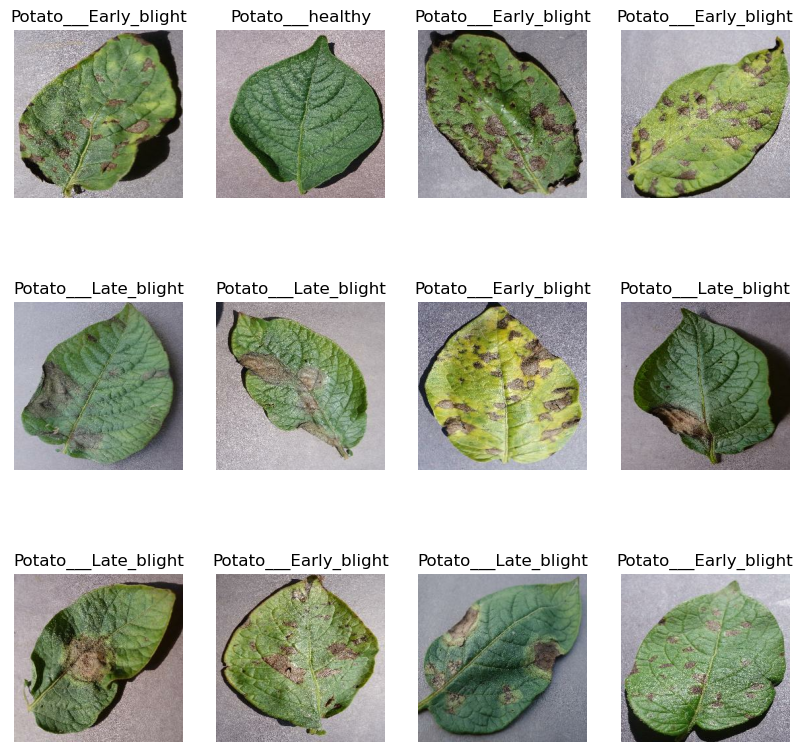

In [7]:
#Visualization of the images
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [8]:
  len(dataset)

68

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_paritions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds,val_ds,test_ds

In [16]:
train_DS,val_DS,test_DS=get_dataset_paritions_tf(dataset)

In [17]:
print(len(train_DS),len(val_DS),len(test_DS))

54 6 8


In [18]:
#Caching is done so the image that is in the memory
#is in the memory so if in the future if tht image is 
#is used again we can use ut from the cache.
#It is just the memory cache
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
#Preprocessing-Scaling
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
#  Image Augumentation-important cause to detect the image
#in every angle rotated, increased contrast, etc
data_augmentaion=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentaion,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 117s 2s/step - loss: 0.8975 - accuracy: 0.4988 - val_loss: 0.8621 - val_accuracy: 0.6719
Epoch 2/50
54/54 [==============================] - 110s 2s/step - loss: 0.6939 - accuracy: 0.7078 - val_loss: 0.5329 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 107s 2s/step - loss: 0.4106 - accuracy: 0.8281 - val_loss: 0.2490 - val_accuracy: 0.9115
Epoch 4/50
54/54 [==============================] - 107s 2s/step - loss: 0.2847 - accuracy: 0.8860 - val_loss: 0.2070 - val_accuracy: 0.9427
Epoch 5/50
54/54 [==============================] - 111s 2s/step - loss: 0.2069 - accuracy: 0.9230 - val_loss: 0.1814 - val_accuracy: 0.9323
Epoch 6/50
54/54 [==============================] - 111s 2s/step - loss: 0.1470 - accuracy: 0.9456 - val_loss: 0.4738 - val_accuracy: 0.8125
Epoch 7/50
54/54 [==============================] - 107s 2s/step - loss: 0.1306 - accuracy: 0.9427 - val_loss: 0.7102 - val_accuracy: 0.8073
Epoch 8/50
54

In [26]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 432ms/step - loss: 0.2232 - accuracy: 0.9440


In [27]:
scores
#first paramater-loss, second parameter-accuracy

[0.22318817675113678, 0.943965494632721]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['accuracy']

[0.49884259700775146,
 0.7077546119689941,
 0.828125,
 0.8859953880310059,
 0.9230324029922485,
 0.9456018805503845,
 0.9427083134651184,
 0.9589120149612427,
 0.9612268805503845,
 0.9629629850387573,
 0.9722222089767456,
 0.9739583134651184,
 0.9797453880310059,
 0.9756944179534912,
 0.9589120149612427,
 0.9832175970077515,
 0.9809027910232544,
 0.9837962985038757,
 0.9675925970077515,
 0.9774305820465088,
 0.9658564925193787,
 0.9762731194496155,
 0.9849537014961243,
 0.9837962985038757,
 0.9913194179534912,
 0.9785879850387573,
 0.9878472089767456,
 0.9890046119689941,
 0.9797453880310059,
 0.9728009104728699,
 0.9907407164573669,
 0.9907407164573669,
 0.9803240895271301,
 0.9907407164573669,
 0.9924768805503845,
 0.9866898059844971,
 0.9901620149612427,
 0.9861111044883728,
 0.9635416865348816,
 0.9924768805503845,
 0.9890046119689941,
 0.9814814925193787,
 0.9901620149612427,
 0.9895833134651184,
 0.9953703880310059,
 0.9918981194496155,
 0.9918981194496155,
 0.9918981194496155,
 

In [32]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


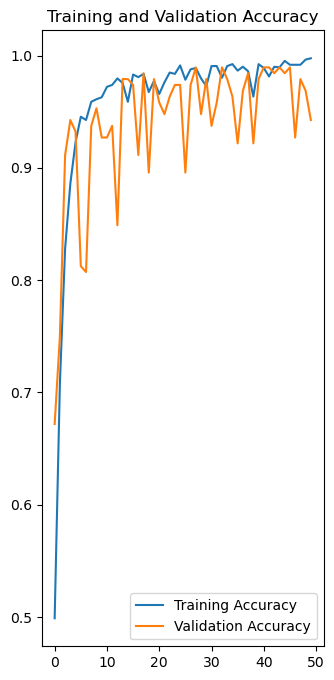

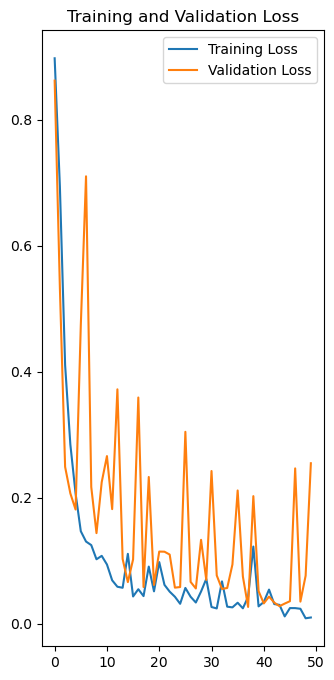

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 412ms/step
prediction label: Potato___Early_blight


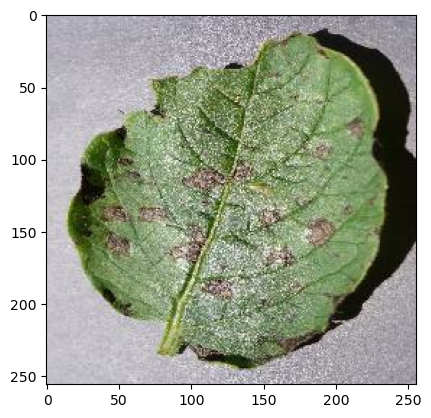

In [39]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print("prediction label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 74ms/step


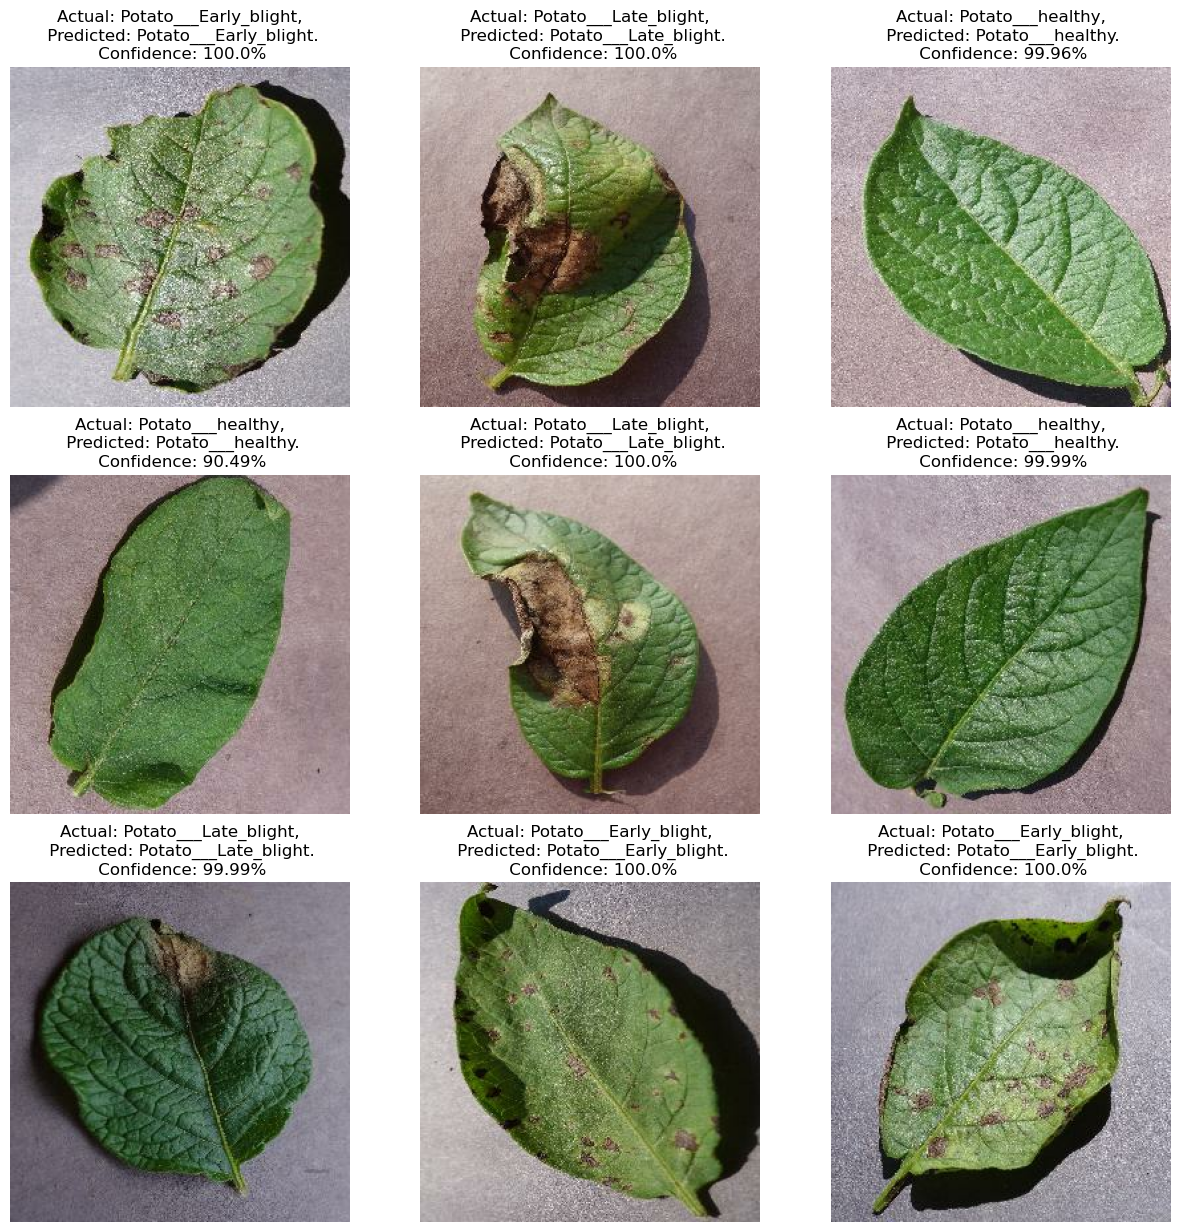

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [55]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
